LE409 - Statistics and Probability for Engineering

Prof. Leonardo Tomazeli Duarte - FCA/UNICAMP

Activity 11 - Computational Project (12/12/2021)

- Augusto Chebel Machado - RA: 231762

- Lucas Tramonte - RA: 182697

# Libraries

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t as t_student
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

Last two digits of the lowest AR of the pair (182697 < 231762): 97

Therefore, the data set considered was:

- M_control_97: Data set representing the waiting times of the equipment in the queue considering the
current industry policy (control group);

- M_treatment_97: Data set representing the waiting times of the equipment in the queue considering the new process (treatment group).
the new process (treatment group).


# Read datasets

In [2]:
df_controle = pd.read_excel('Assets\Datasets\M_controle_97.xlsx', index_col=0)
df_tratamento = pd.read_excel('Assets\Datasets\M_tratamento_97.xlsx', index_col=0)

# Converting read data to NumPy array
data_c = df_controle.to_numpy()
data_t = df_tratamento.to_numpy()

# Checking that the import has taken place correctly:
print('control_date:')
print(f'Size: {data_c.size}')
print(data_c)

print('\n treatment_date:')
print(f'Size: {data_t.size}')
print(data_t[0:3])                # for visual effect only
print('   ...')                   # print(data_t) prints all 500 lines
print(data_t[497:500])

control_date:
Size: 24800
[[ 752.01791838]
 [ 971.50484213]
 [ 732.99849632]
 ...
 [1171.100619  ]
 [ 842.93410071]
 [ 845.16136474]]

 treatment_date:
Size: 500
[[912.52148123]
 [738.03314547]
 [616.86399392]]
   ...
[[423.02435694]
 [718.442854  ]
 [651.80498197]]


## (a) Carry out a descriptive analysis (mean, median, quartiles, deviation, etc.) of the two sets of data provided

In [3]:
# Descriptive Analysis:

# Control_data:
amostras_c = data_c.size                          # number of data
media_c  = data_c.mean()                          # average
mediana_c = np.percentile(data_c, 50)             # median
prim_quartil_c = np.quantile(data_c, 0.25)        # first quartile
seg_quartil_c = mediana_c                         # second quartile
terc_quartil_c = np.quantile(data_c, 0.75)        # third quartile
inter_quartil_c = terc_quartil_c - prim_quartil_c # interquartile distance
max_c = data_c.max()                              # longest waiting time obtained
min_c = data_c.min()                              # shortest waiting time obtained
desvio_c = np.std(data_c)                         # standard deviation
variancia_c = np.var(data_c)                      # variance


print('--------------- Control data ---------------')
print(f'Number of data collected: {amostras_c} samples')
print(f'Average: {round(media_c, 4)} minutes')
print(f'Median: {round(mediana_c, 4)} minutes')
print(f'First quartile: {round(prim_quartil_c, 4)} minutes')
print(f'Second quartile (= median): {round(seg_quartil_c, 4)} minutes')
print(f'Third quartile: {round(terc_quartil_c, 4)} minutes')
print(f'Interquartile range: {round(inter_quartil_c, 2)} minutes')
print(f'Longest waiting time in queue: {round(max_c, 4)} minutes')
print(f'Shortest waiting time in queue: {round(min_c, 4)} minutes')
print(f'Amplitude: {round((max_c - min_c), 4)} minutes')
print(f'Standard deviation: {round(desvio_c, 4)} minutes')
print(f'Variance: {round(variancia_c, 4)} minutes')

# Treatment_data:
amostras_t = data_t.size
media_t = data_t.mean()
mediana_t = np.percentile(data_t, 50)
prim_quartil_t = np.quantile(data_t, 0.25)
seg_quartil_t = mediana_t
terc_quartil_t = np.quantile(data_t, 0.75)
inter_quartil_t = terc_quartil_t - prim_quartil_t
max_t = data_t.max()
min_t = data_t.min()
desvio_t = np.std(data_t)
variancia_t = np.var(data_t)


print('\n--------------- Treatment data ---------------')
print(f'Number of data collected: {amostras_t} samples')
print(f'Mean: {round(media_t, 4)} minutes')
print(f'Median: {round(mediana_t, 4)} minutes')
print(f'First quartile: {round(prim_quartil_t, 4)} minutes')
print(f'Second quartile (= median): {round(seg_quartil_t, 4)} minutes')
print(f'Third quartile: {round(terc_quartil_t, 4)} minutes')
print(f'Interquartile range: {round(inter_quartil_t, 2)} minutes')
print(f'Longest waiting time in queue: {round(max_t, 4)} minutes')
print(f'Shortest waiting time in queue: {round(min_t, 4)} minutes')
print(f'Amplitude: {round((max_t - min_t), 4)} minutes')
print(f'Standard deviation: {round(desvio_t, 4)} minutes')
print(f'Variance: {round(variancia_t, 4)} minutes')

--------------- Control data ---------------
Number of data collected: 24800 samples
Average: 797.8498 minutes
Median: 796.2216 minutes
First quartile: 661.4693 minutes
Second quartile (= median): 796.2216 minutes
Third quartile: 932.8395 minutes
Interquartile range: 271.37 minutes
Longest waiting time in queue: 1579.7586 minutes
Shortest waiting time in queue: -75.9035 minutes
Amplitude: 1655.6621 minutes
Standard deviation: 199.6775 minutes
Variance: 39871.0978 minutes

--------------- Treatment data ---------------
Number of data collected: 500 samples
Mean: 742.0221 minutes
Median: 742.0895 minutes
First quartile: 611.8033 minutes
Second quartile (= median): 742.0895 minutes
Third quartile: 870.9872 minutes
Interquartile range: 259.18 minutes
Longest waiting time in queue: 1447.6478 minutes
Shortest waiting time in queue: 125.4664 minutes
Amplitude: 1322.1814 minutes
Standard deviation: 208.1154 minutes
Variance: 43312.0107 minutes


Thus, it can be seen that from the Control Data to the Treatment Data, the Standard Deviation and Variance increased, which was to be expected, since the number of samples was significantly reduced, increasing the uncertainty about the population. On the other hand, there was a reduction in the mean, but as this was accompanied by a decrease in the number of samples, it is not possible to draw a conclusion before the sample data has been properly processed.

## b) Plot the box-plots of the two sets of data in the same figure.

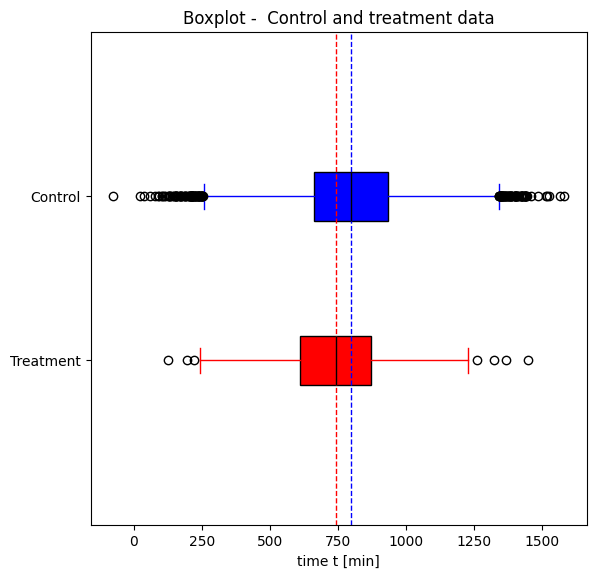

In [4]:
# boxplots

fig = plt.figure(figsize=[6.4, 6.4])
ax = fig.add_subplot(111)

ax.boxplot(data_c, vert=0, positions=[1.5], patch_artist=True,
           boxprops=dict(facecolor='blue', color='black'),          # fill and contour (first and third quartiles)
           capprops=dict(color='blue'),                             # max and min
           whiskerprops=dict(color='blue'),                         # horizontal line
           flierprops=dict(color='black', markeredgecolor='black'), # outliers
           medianprops=dict(color='black'))                         # median
ax.boxplot(data_t, vert=0, positions=[1], patch_artist=True,
           boxprops=dict(facecolor='red', color='black'),           # filling and contouring (first and third quartiles)
           capprops=dict(color='red'),                              # max and min
           whiskerprops=dict(color='red'),                          # horizontal line
           flierprops=dict(color='black', markeredgecolor='black'), # outliers
           medianprops=dict(color='black'))                         # median


ax.set_yticklabels(['Control', 'Treatment'])
ax.set_title('Boxplot -  Control and treatment data')
ax.set_xlabel('time t [min]')
ax.axvline(mediana_c, color='b', linestyle='dashed', linewidth=1)
ax.axvline(mediana_t, color='r', linestyle='dashed', linewidth=1)

plt.show()

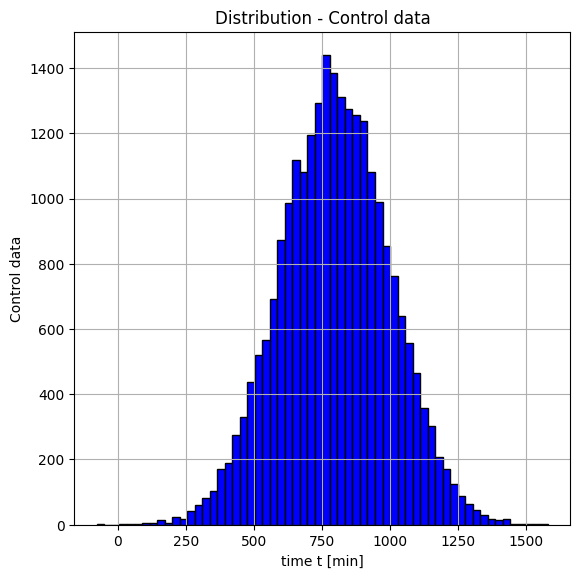

--------------------------------------------------


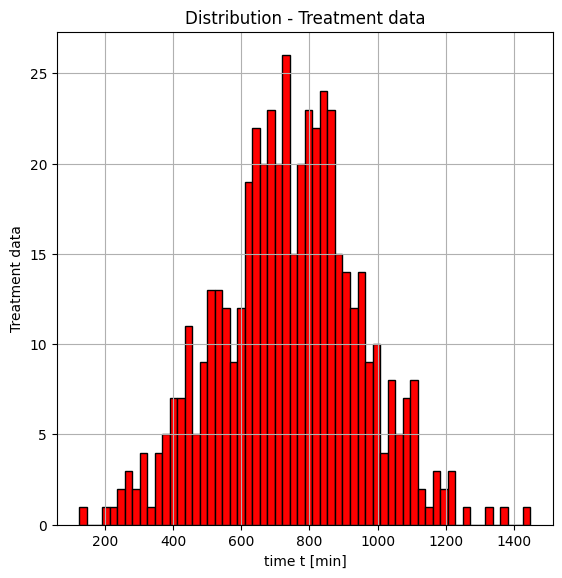

In [5]:
# histograms

plt.figure(1, figsize=[6.4, 6.4])
plt.grid()
plt.hist(data_c, bins=60, color='blue', edgecolor='black')
plt.title('Distribution - Control data')
plt.xlabel('time t [min]')
plt.ylabel('Control data')
plt.show()

print(50*'-')

plt.figure(2, figsize=[6.4, 6.4])
plt.grid()
plt.hist(data_t, bins=60, color='red', edgecolor='black')
plt.title('Distribution - Treatment data')
plt.xlabel('time t [min]')
plt.ylabel('Treatment data')
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_3796\2805432742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_controle, color='blue')
c:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


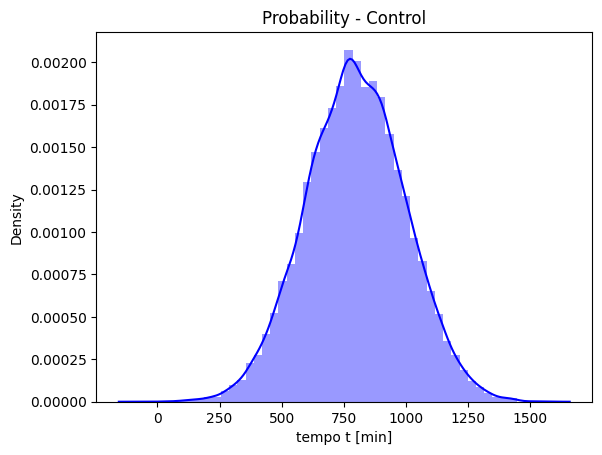

C:\Users\lucas\AppData\Local\Temp\ipykernel_3796\2805432742.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tratamento, color='red')
c:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


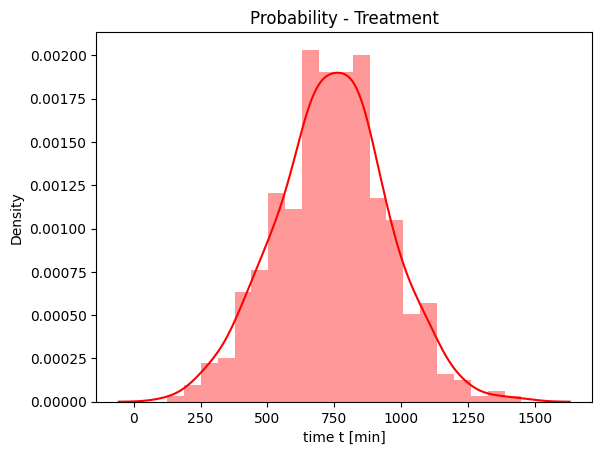

In [6]:
# more robust approach

plt.figure()
sns.distplot(df_controle, color='blue')
plt.title('Probability - Control')
plt.xlabel('tempo t [min]')
plt.show()

plt.figure()
sns.distplot(df_tratamento, color='red')
plt.title('Probability - Treatment')
plt.xlabel('time t [min]')
plt.show()

From the histograms constructed, it can be seen that the dispositions of both the control and treatment data can be approximated by a Gaussian (normal) distribution:

- C ~ N (mu_c, sigma_c)
- T ~ N (mu_t, sigma_t)

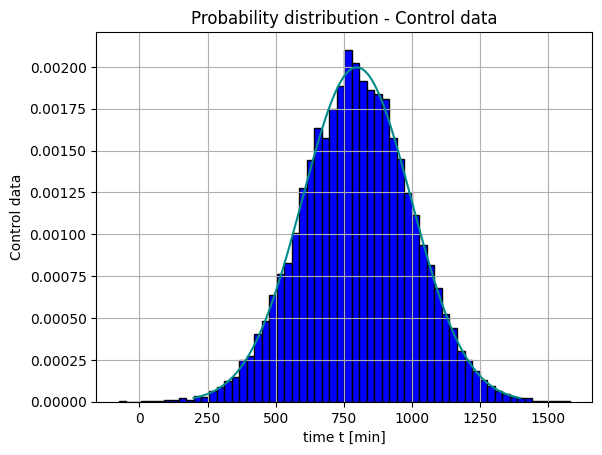

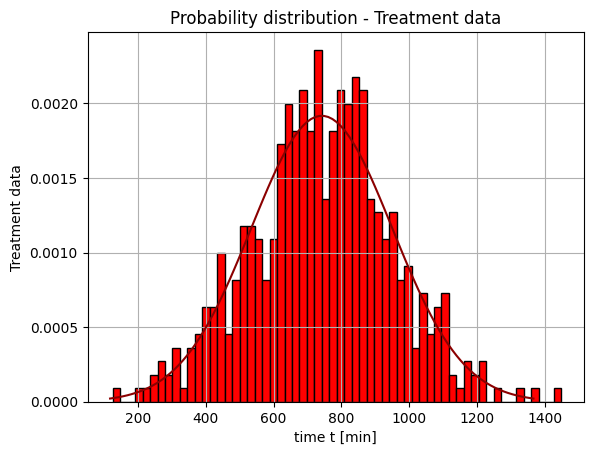

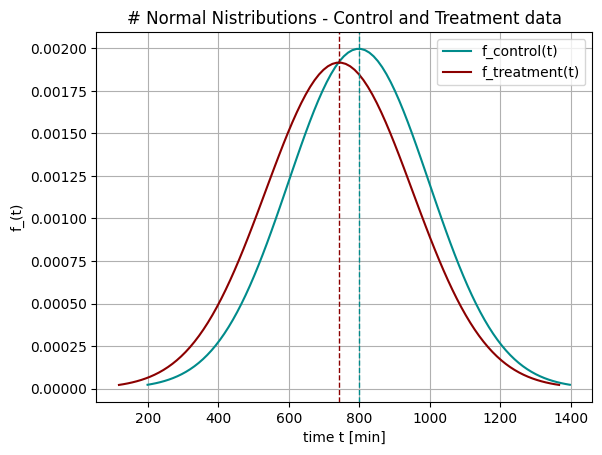

In [8]:
# Normal approximations:
mu_c = media_c
sigma_c = desvio_c

mu_t = media_t
sigma_t = desvio_t

# control
plt.figure(1)
plt.grid()
plt.hist(data_c, bins=60, color='blue', edgecolor='black', density=True)
t_c = np.linspace(mu_c - 3*sigma_c, mu_c + 3*sigma_c, 100)
plt.plot(t_c, norm.pdf(t_c, mu_c, sigma_c), color='darkcyan', label='f_controle(t)')
plt.title('Probability distribution - Control data')
plt.xlabel('time t [min]')
plt.ylabel('Control data')
plt.show()

print()

# treatment
plt.figure(2)
plt.grid()
plt.hist(data_t, bins=60, color='red', edgecolor='black', density=True)
t_t = np.linspace(mu_t - 3*sigma_t, mu_t + 3*sigma_t, 100)
plt.plot(t_t, norm.pdf(t_t, mu_t, sigma_t), color='darkred', label='f_treatment(t)')
plt.title('Probability distribution - Treatment data')
plt.xlabel('time t [min]')
plt.ylabel('Treatment data')
plt.show()

print()

# normal distributions - control and treatment
plt.figure(3)
t_c = np.linspace(mu_c - 3*sigma_c, mu_c + 3*sigma_c, 100)
plt.plot(t_c, norm.pdf(t_c, mu_c, sigma_c), color='darkcyan', label='f_control(t)')
plt.title('# Normal Nistributions - Control and Treatment data')
plt.xlabel('time t [min]')
plt.ylabel('f_(t)')
t_t = np.linspace(mu_t - 3*sigma_t, mu_t + 3*sigma_t, 100)
plt.plot(t_t, norm.pdf(t_t, mu_t, sigma_t), color='darkred', label='f_treatment(t)')
plt.grid()
plt.legend()
plt.axvline(mu_c, color='darkcyan', linestyle='dashed', linewidth=1)
plt.axvline(mu_t, color='darkred', linestyle='dashed', linewidth=1)
plt.show()

## c) Carry out a hypothesis test to see if there is statistical evidence pointing to the fact that the new process has in fact reduced the average waiting time in the queue.

One-sided hypothesis test, considering the known deviation:
1. Hypothesis:
 - H0: mu = mu_c (average time in queue has not changed)
 - HA: mu < mu_c (average time in queue has decreased)
2. Test of significance:
 - alpha = 1% (significance level - arbitrary)
 - alpha = 5%
 - alpha = 10%
3. Obtaining the samples:
 - n = samples_t (500 samples)
4. Test statistic:
 - m = mu_t (average of treatment data)
5. Region in which the null hypothesis is not rejected:
 - critical points determined by the standardization of the distribution and the significance level





z limit (alpha = 0.1): -1.28
standardized z: -6.0



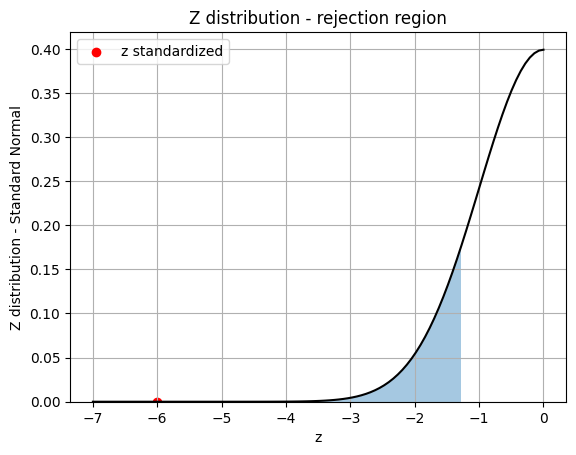


 The null hypothesis is rejected!
Therefore, the difference observed between the average waiting times in the queue before and after treatment is statistically significant!
There was a reduction in the average waiting time in the queue after treatment!

------------------------------------------------------------------------------------------------------------------------------------------------------

z limit (alpha = 0.05): -1.64
standardized z: -6.0



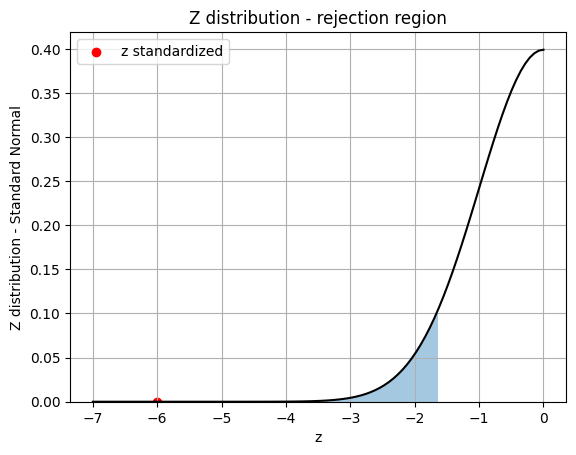


 The null hypothesis is rejected!
Therefore, the difference observed between the average waiting times in the queue before and after treatment is statistically significant!
There was a reduction in the average waiting time in the queue after treatment!

------------------------------------------------------------------------------------------------------------------------------------------------------

z limit (alpha = 0.01): -2.33
standardized z: -6.0



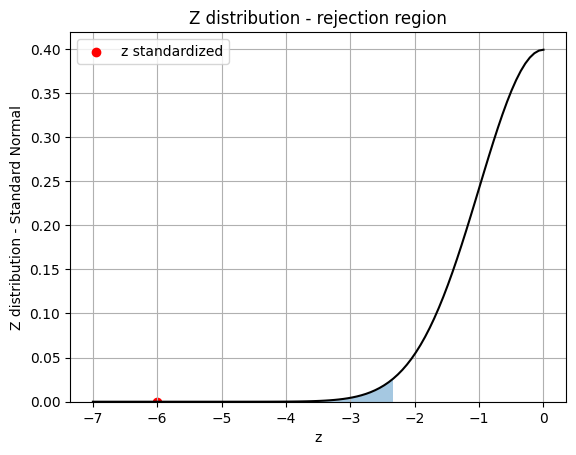


 The null hypothesis is rejected!
Therefore, the difference observed between the average waiting times in the queue before and after treatment is statistically significant!
There was a reduction in the average waiting time in the queue after treatment!

------------------------------------------------------------------------------------------------------------------------------------------------------


In [9]:
# One-sided hypothesis test, considering the known population variance
# z-test

# H0: mu = mu_c
# HA: mu < mu_c

# significance level:
alpha = [0.10, 0.05, 0.01]

n = amostras_t                    # number of samples
mu = mu_c                         # mean = mean_control (null hypothesis true)
m = mu_t                          # sample mean
sigma = sigma_t                   # population deviation = sample deviation

z = (m - mu)/(sigma/np.sqrt(n))   # standardization

# checking the table for each significance level and drawing conclusions from the hypothesis tests:
for i in range(len(alpha)):
  z_critico = round(norm.ppf(alpha[i]), 2)
  print(f'\nz limit (alpha = {alpha[i]}): {z_critico}')
  print(f'standardized z: {round(z, 2)}\n')
  plt.figure()
  plt.grid()
  plt.xlabel('z')
  plt.ylabel('Z distribution - Standard Normal')
  plt.title('Z distribution - rejection region')
  x = np.linspace(-7, 0, 100)
  x2 = np.arange(-7, z_critico, 0.01)
  y = norm.pdf(x, 0, 1)
  plt.plot(x, y, '-', color='black')
  plt.scatter(z, 0, color='red', label='z standardized')
  plt.bar(x2, norm.pdf(x2, 0, 1), width=0.01, alpha=0.4)
  plt.legend()
  plt.show()
  if (z < z_critico):
    print('\n The null hypothesis is rejected!')
    print('Therefore, the difference observed between the average waiting times in the queue before and after treatment is statistically significant!')
    print('There was a reduction in the average waiting time in the queue after treatment!\n')
    print(150*'-')
  else:
    print('\n The null hypothesis is NOT rejected!\n')
    print('Therefore, the difference observed between the average waiting times in the queue before and after treatment is NOT statistically significant!')
    print('There was no reduction in the average waiting time in the queue after treatment!\n')
    print(150*'-')

One-sided hypothesis test (considering the unknown population variance):
1. Hypothesis:
 - H0: mu = mu_c (average time in queue has not changed)
 - HA: mu < mu_c (average time in queue has decreased)
2. Test of significance:
 - alpha = 1% (significance level - arbitrary)
 - alpha = 5%
 - alpha = 10%
3. Obtaining the samples:
 - n = samples_t (500 samples)
4. Test statistic:
 - m = mu_t (average of treatment data)
5. Region in which the null hypothesis is not rejected:
 - critical points determined by the standardization of the distribution and the significance level (Student's t-test).




t limit (alpha = 0.1): -1.28
t standardized: -6.0



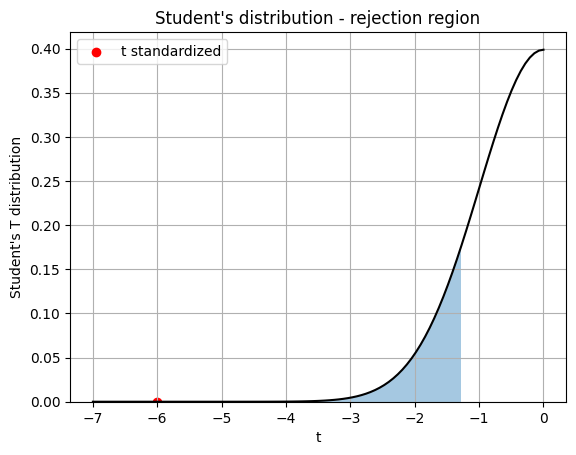


 The null hypothesis is rejected!
Therefore, the difference observed between the average waiting times in the queue before and after treatment is statistically significant!
There was a reduction in the average waiting time in the queue after treatment!

------------------------------------------------------------------------------------------------------------------------------------------------------

t limit (alpha = 0.05): -1.65
t standardized: -6.0



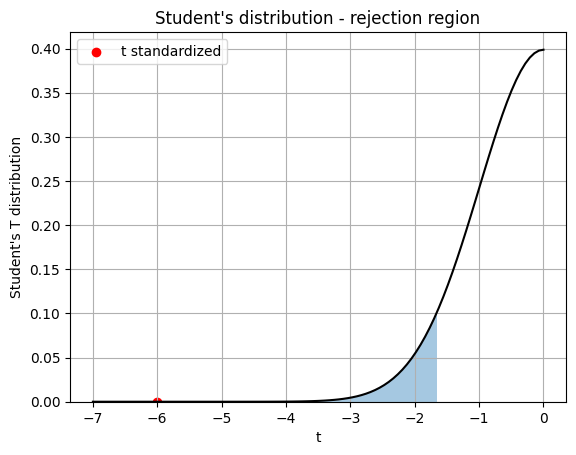


 The null hypothesis is rejected!
Therefore, the difference observed between the average waiting times in the queue before and after treatment is statistically significant!
There was a reduction in the average waiting time in the queue after treatment!

------------------------------------------------------------------------------------------------------------------------------------------------------

t limit (alpha = 0.01): -2.33
t standardized: -6.0



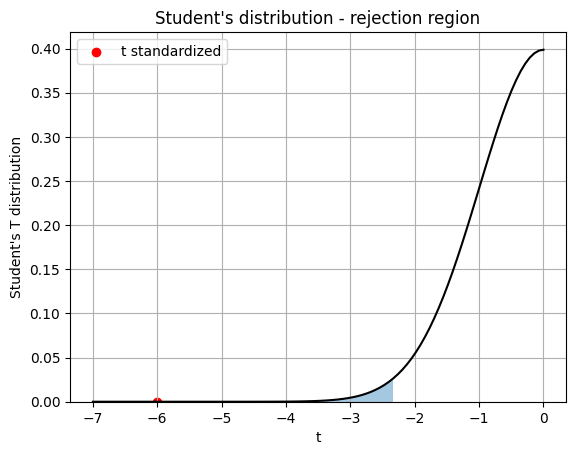


 The null hypothesis is rejected!
Therefore, the difference observed between the average waiting times in the queue before and after treatment is statistically significant!
There was a reduction in the average waiting time in the queue after treatment!

------------------------------------------------------------------------------------------------------------------------------------------------------


In [11]:
# One-sided hypothesis test with unknown population variance:
# Student's t-test
# assuming that the population is shaped by a normal distribution

# H0: mu = mu_c
# HA: mu < mu_c

# significance level:
alpha = [0.10, 0.05, 0.01]

n = amostras_t                # number of samples
mu = mu_c                     # mean = mean_control (null hypothesis true)
m = mu_t                      # sample mean
s = sigma_t                   # population deviation approximated by sample deviation (Student's t-test)

t = (m - mu)/(s/np.sqrt(n))   # t de Student
k = n - 1                     # degree of freedom

# t critical for each alpha and test evaluation:
for i in range(len(alpha)):
  t_critico = round(t_student.ppf(alpha[i], k), 2)
  print(f'\nt limit (alpha = {alpha[i]}): {t_critico}')
  print(f't standardized: {round(t, 2)}\n')
  plt.figure()
  plt.grid()
  plt.xlabel('t')
  plt.ylabel("Student's T distribution")
  plt.title("Student's distribution - rejection region")
  x = np.linspace(-7, 0, 100)
  x2 = np.arange(-7, t_critico, 0.01)
  y = t_student.pdf(x, k, 0, 1)
  plt.plot(x, y, '-', color='black')
  plt.scatter(t, 0, color='red', label='t standardized')
  plt.bar(x2, t_student.pdf(x2, k, 0, 1), width=0.01, alpha=0.4)
  plt.legend()
  plt.show()
  if (t < t_critico):
    print('\n The null hypothesis is rejected!')
    print('Therefore, the difference observed between the average waiting times in the queue before and after treatment is statistically significant!')
    print('There was a reduction in the average waiting time in the queue after treatment!\n')
    print(150*'-')
  else:
    print('\nThe null hypothesis is NOT rejected!\n')
    print('Therefore, the difference observed between the average waiting times in the queue before and after treatment is NOT statistically significant!')
    print('There was no reduction in the average waiting time in the queue after treatment!\n')
    print(150*'-')
    

Analyzing the results, it can be seen that taking into account the known or unknown population deviation does not affect the final result. This can be explained by the fact that the degree of freedom of the Student's t distribution is high, due to the large number of samples, which brings this distribution ever closer to a standard normal.

In this way, the sample deviations can be considered the same as the population deviations without major losses in precision and reliability.

One-sided hypothesis test comparing sample means (before and after treatment):
1. Hypotheses:
 - H0: mu_c - mu_t = 0 (average time in queue did not change)
 - HA: mu_c - mu_t > 0 (average time in line decreased)
2. Significance test:
 - alpha = 1% (significance level - arbitrary)
 - alpha = 5%
 - alpha = 10%
3. Obtaining the samples:
 - n_c = samples_c (24800 samples)
 - n_t = samples_t (500 samples)
4. Test statistics:
 - m_c = mean_c (mean of control data)
 - m_t = mean_t (mean of treatment data)
5. Region in which the null hypothesis is not rejected:
 - critical points determined by the standardization of the distribution and the significance level

In [12]:
# One-sided hypothesis test considering comparison between means:

# H0: mu_c - mu_t = 0
# HA: mu_c - mu_t > 0

# significance level:
alpha = [0.10, 0.05, 0.01]

# control:
n_c = amostras_c      # number of samples
m_c = media_c         # sample mean
sigma_c = desvio_c    # sample deviation

# treatment:
n_t = amostras_t
m_t = media_t
sigma_t = desvio_t

# null hypothesis:
D0 = 0

# standardizing:
z = (m_t - m_c - D0) / np.sqrt((np.power(sigma_c, 2)/n_c) + (np.power(sigma_t, 2)/n_t))

# checking the table for each significance level and drawing conclusions from the hypothesis tests:
for i in range(len(alpha)):
  z_critico = round(norm.ppf(alpha[i]), 2)
  print(f'\nz limit (alpha = {alpha[i]}): {z_critico}')
  print(f'z standardized: {round(z, 2)}\n')
  if (z < z_critico):
    print('The null hypothesis is rejected!')
    print('Therefore, the difference observed between the average waiting times in the queue before and after treatment is statistically significant!')
    print('There was a reduction in the average waiting time in the queue after treatment!\n')
    print(150*'-')
  else:
    print('The null hypothesis is NOT rejected!\n')
    print('Therefore, the difference observed between the average waiting times in the queue before and after treatment is NOT statistically significant!')
    print('There was no reduction in the average waiting time in the queue after treatment!\n')
    print(150*'-')
    


z limit (alpha = 0.1): -1.28
z standardized: -5.94

The null hypothesis is rejected!
Therefore, the difference observed between the average waiting times in the queue before and after treatment is statistically significant!
There was a reduction in the average waiting time in the queue after treatment!

------------------------------------------------------------------------------------------------------------------------------------------------------

z limit (alpha = 0.05): -1.64
z standardized: -5.94

The null hypothesis is rejected!
Therefore, the difference observed between the average waiting times in the queue before and after treatment is statistically significant!
There was a reduction in the average waiting time in the queue after treatment!

------------------------------------------------------------------------------------------------------------------------------------------------------

z limit (alpha = 0.01): -2.33
z standardized: -5.94

The null hypothesis is rejected

When we consider two different populations (and in fact they are data sources whose methods for waiting time in the queue are different), we can see that the result is close to that obtained for a single population, due to the difference in the number of samples of the control and treatment data.

Thus, the term referring to the deviation of the control group has little contribution (large number of samples) and the result is close to the unilateral hypothesis test considering only one population (either with known or unknown deviation).

## d) Calculate the p-value associated with the test and discuss the results obtained.

In [13]:
# p-value for one-sided test with known variance:
n = amostras_t                    # number of samples
mu = mu_c                         # mean = mean_control (null hypothesis true)
m = mu_t                          # sample mean
sigma = sigma_t                   # population deviation = sample deviation

print('P-value for one-sided test with known deviation:')

z = (m - mu)/(sigma/np.sqrt(n))   # standardization
print(f'standardized z: {round(z, 2)}')

valor_p = norm.cdf(z)
print(f'Associated p-value: {valor_p*100}%\n')

# p-value for one-sided test with unknown variance:
n = amostras_t                # number of samples
mu = mu_c                     # mean = mean_control (null hypothesis true)
m = mu_t                      # sample mean
s = sigma_t                   # population deviation approximated by sample deviation (Student's t-test)

print('P-value for one-sided test with unknown variance:')

t = (m - mu)/(s/np.sqrt(n))   # t de Student
k = n - 1                     # grau de liberdade
print(f't standardized: {round(t, 2)}')

valor_p = t_student.cdf(t, k)
print(f'Associated p-value: {valor_p*100}%\n')

# p-value for one-sided test comparing sample means:

print('P-value for one-sided test comparing sample means from different populations:')

# control:
n_c = amostras_c      # number of samples
m_c = media_c         # sample mean
sigma_c = desvio_c    # sample deviation

# treatament:
n_t = amostras_t
m_t = media_t
sigma_t = desvio_t

# null hypothesis:
D0 = 0

# standardizing:
z = (m_t - m_c - D0) / np.sqrt((np.power(sigma_c, 2)/n_c) + (np.power(sigma_t, 2)/n_t))
print(f'standardized z: {round(z, 2)}')

valor_p = norm.cdf(z)
print(f'Associated p-value: {valor_p*100}%')

P-value for one-sided test with known deviation:
standardized z: -6.0
Associated p-value: 9.967866818032698e-08%

P-value for one-sided test with unknown variance:
t standardized: -6.0
Associated p-value: 1.9158800894088103e-07%

P-value for one-sided test comparing sample means from different populations:
standardized z: -5.94
Associated p-value: 1.395598583904755e-07%


It can be seen that the p-value is very small and can even be considered null, regardless of the hypothesis test used. This implies that the data obtained before the treatment (control) and after the application of the new method (treatment) have statistical differences that are not the result of chance. Even with the difference in the number of samples available, the descriptive analysis already allowed for some suspicion of this occurrence, which was confirmed using different hypothesis tests.

Thus, the p-value is lower than most of the relevant significance levels, which means that the null hypothesis that there was no reduction in the average waiting time in the queue before and after treatment is rejected, and that it is possible to state that the variation between the averages is statistically significant.
